# Google Data Analytics Certificate

## Capstone Project: Case study II


            




## Introduction

Bellabeat is a high-tech manufacturer of health-focused products for women. Urška Sršen and Sando Mur are the founder of the company. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.


## Ask

> **Objective of the Report**

Analyzing smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. Select one Bellabeat product to apply these insights.

What to observe from the insight:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?


## Prepare

> **Data Used**

The data used for this study was downloaded from kaggle. The data contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

> **Data Characteristics**

1. The data was downloaded as a zip file which contains many csv files on different personal tracker data. Each csv file contain a long formated data.
2. The data was only collected for 33 user with unique ID.
3. After sorting the data, we saw that the it will answer the report objectives.
3. One of the dataset (Sleep data) have some missing users.

## Process

> Tools used : Python and Ms excel



#### Importation of needed Libraries

The imported libraries are:

- Pandas for data manipulation and cleaning
- Numpy for calclation
- Matplotlib and seaborn for visualization.
- Datetime to deal with time variables in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Dataset importaion

The dataset needed for the report were imported as csv file. The analysis focus more on daily dataset. Hourly sleep data was used also in the process.

In [2]:
#Import daily activities to explore the features
daily_act = pd.read_csv("dailyActivity_merged.csv")
daily_cal = pd.read_csv("dailyCalories_merged.csv")
daily_int = pd.read_csv("dailyIntensities_merged.csv")
daily_stp = pd.read_csv("dailySteps_merged.csv")
hb = pd.read_csv("heartrate_seconds_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")
hourly_stp = pd.read_csv("hourlySteps_merged.csv")

#### Data Wrangling

The dataset was preview and it was discovered that, all the important variable were already combine inside the dailyActivity_merged. We checked for the data type, shape, missing values, and summarization of the data characteristics.

In [3]:
#Checking the variable names of some dataset
daily_act.columns , sleep.columns, daily_cal.columns

(Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
        'LoggedActivitiesDistance', 'VeryActiveDistance',
        'ModeratelyActiveDistance', 'LightActiveDistance',
        'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
        'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
       dtype='object'),
 Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
        'TotalTimeInBed'],
       dtype='object'),
 Index(['Id', 'ActivityDay', 'Calories'], dtype='object'))

In [4]:
daily = daily_act.copy()

In [5]:
#Checking the data in each variables
daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
#Checking for missing value
daily_act.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
#Discriptive statistics
daily_act.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,940.0,4.855407e+09,2.424805e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,940.0,7.637911e+03,5.087151e+03,0.000000e+00,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
TotalDistance,940.0,5.489702e+00,3.924606e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
TrackerDistance,940.0,5.475351e+00,3.907276e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
LoggedActivitiesDistance,940.0,1.081709e-01,6.198965e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
VeryActiveDistance,940.0,1.502681e+00,2.658941e+00,0.000000e+00,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
ModeratelyActiveDistance,940.0,5.675426e-01,8.835803e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
LightActiveDistance,940.0,3.340819e+00,2.040655e+00,0.000000e+00,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
SedentaryActiveDistance,940.0,1.606383e-03,7.346176e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,940.0,2.116489e+01,3.284480e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


In [9]:
#Checking the unique count of each variable
daily.nunique(),sleep.nunique()

(Id                           33
 ActivityDate                 31
 TotalSteps                  842
 TotalDistance               615
 TrackerDistance             613
 LoggedActivitiesDistance     19
 VeryActiveDistance          333
 ModeratelyActiveDistance    211
 LightActiveDistance         491
 SedentaryActiveDistance       9
 VeryActiveMinutes           122
 FairlyActiveMinutes          81
 LightlyActiveMinutes        335
 SedentaryMinutes            549
 Calories                    734
 dtype: int64,
 Id                     24
 SleepDay               31
 TotalSleepRecords       3
 TotalMinutesAsleep    256
 TotalTimeInBed        242
 dtype: int64)

### Data Cleaning 
Adding new column to the data, concerting date column from object to datetime, and creating a data base on grouping by user ID.

In [12]:
#Converting the date column into datetime data
daily["ActivityDate"] = pd.to_datetime(daily["ActivityDate"])

In [13]:
#Creating the day column
daily['day'] = daily["ActivityDate"].dt.dayofweek
daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5


In [14]:
#Grouping the data base on the ID
daily_gp = daily.groupby("Id").mean().drop(['day'], axis=1)
daily_gp.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452


In [15]:
#Creating user type column base on users' daily step
user_type = []
for i in daily_gp["TotalSteps"]:
    if i < 5000:
        user_type.append("sedentary")
    elif i < 7499:
        user_type.append("lightly active")
    elif i < 9999:
        user_type.append("fairly active")
    else:
        user_type.append("very active")

In [16]:
#Adding the new user activity list to the dataframe
daily_gp['user_type'] = user_type

## Analyze Phase

In this section, we will explore the hidden patterns in the dataset using plots.

#### Exploratory Data Analysis

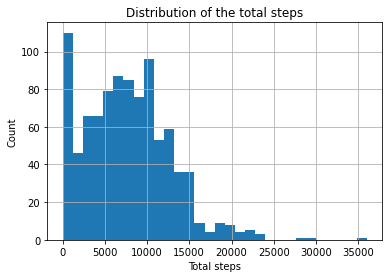

In [17]:
#Checking the distribution of user daily's total step
daily['TotalSteps'].hist(bins = 30)
plt.title("Distribution of the total steps")
plt.xlabel("Total steps")
plt.ylabel("Count")
plt.show()

C:\Users\win10\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


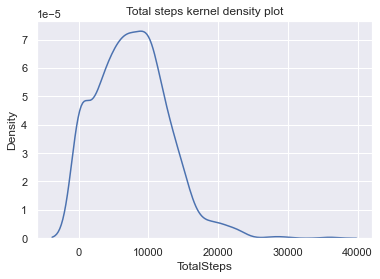

In [18]:
sns.set()
sns.kdeplot(daily['TotalSteps'],bw=0.25)
plt.title("Total steps kernel density plot")
plt.show()

It can be seen from the total steps kernel density plot that most of the user take between 4000 steps to 10,200 steps. Also, it can be seen that there are some extreme values like 30000 steps to 40000 steps.

C:\Users\win10\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


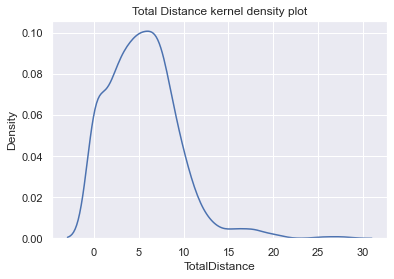

In [20]:
sns.set()
sns.kdeplot(daily['TotalDistance'],bw=0.25)
plt.title("Total Distance kernel density plot")
plt.show()

It can be seen from the total distance kernel density plot that most of the user walks or run an average distance of 2 km to 8km. Also, it can be seen that there are some extreme values like 20km to 30km.

The calories distribution shows that the daily average calories is not normaly distributed. Most of the user average 2000 calories daily.

C:\Users\win10\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


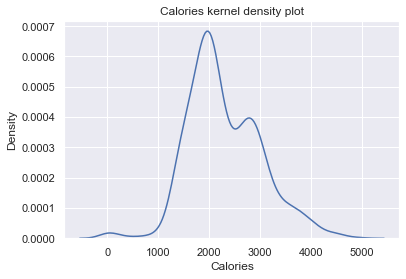

In [22]:
sns.kdeplot(daily['Calories'],bw=0.25)
plt.title("Calories kernel density plot")
plt.show()

##### Creating new data base on days of the week. 

In [23]:
#Aggregating the dataframe base on days of the week
days = daily.groupby("day").mean().drop(['Id'], axis=1)
days.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
day,,,,,,,,,,,,,
0,7780.866667,5.552917,5.528750,0.224552,1.537333,0.585833,3.363083,0.002583,23.108333,14.000000,192.058333,1027.941667,2324.208333
1,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158
2,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000
3,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429
4,7448.230159,5.309921,5.302936,0.072186,1.312937,0.483810,3.489127,0.001825,20.055556,12.111111,204.198413,1000.309524,2331.785714


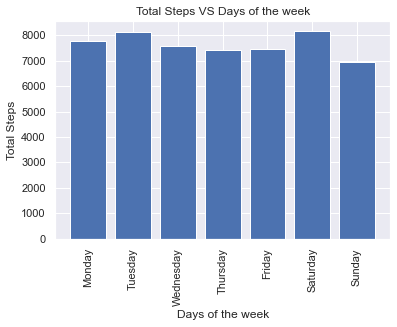

In [32]:
#Plotting Total 
days_lab = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.bar(days.index,days["TotalSteps"])
plt.ylabel("Total Steps")
plt.xlabel("Days of the week")
plt.title("Total Steps VS Days of the week")
plt.xticks(range(7),days_lab, rotation = 90)
plt.show()

The plot above shows that users take the highest steps on saturday followed by tuesday. Sunday have the lowest total number of steps by users.

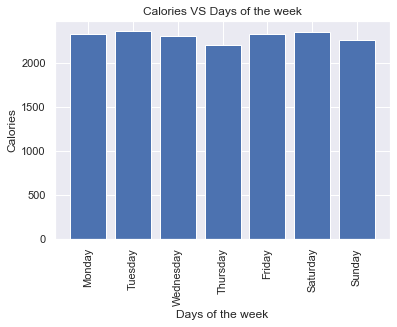

In [33]:
plt.bar(days.index,days["Calories"])
plt.xticks(range(7),days_lab)
plt.ylabel("Calories")
plt.xlabel("Days of the week")
plt.title("Calories VS Days of the week")
plt.xticks(range(7),days_lab, rotation = 90)
plt.show()

The calories vs days of the week plot as expected shows that the highest number of calories was on saturday and tuesday. But, the lowest calories was on thursday.

In [36]:
round(daily_gp['user_type'].value_counts()/33*100,2)

lightly active    27.27
fairly active     27.27
sedentary         24.24
very active       21.21
Name: user_type, dtype: float64

The distribution of the user can be seen to be unbias to some extent. Very active user are the fewest. Now we visualise the distribution.

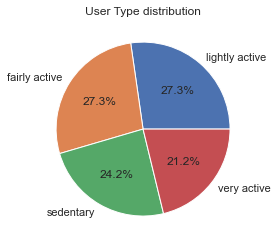

In [38]:
plt.pie(daily_gp['user_type'].value_counts(),labels = daily_gp['user_type'].value_counts().index, autopct='%1.1f%%')
plt.title("User Type distribution")
plt.show()

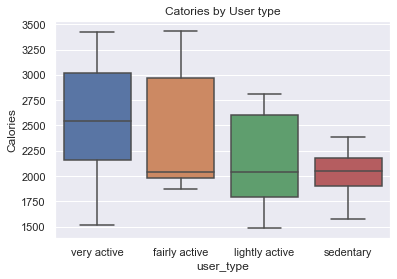

In [40]:
sns.boxplot(x="user_type", y = "Calories", data = daily_gp, order = ["very active", "fairly active","lightly active", "sedentary"])
plt.title("Catories by User type")
plt.show()

The calories and user type boxplot shows that active user and fairly user have high calories burn compare to the other two groups. The active user calories varies significant. The lighly active user have the least calories burning.

In [41]:
#Adding new column of week days
sleep['day'] = pd.to_datetime(sleep["SleepDay"]).dt.weekday

In [42]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,1
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,2
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,4
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,5
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,6


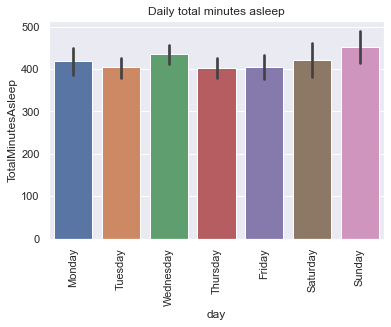

In [43]:
#Daily combined total minute asleep
sns.barplot(x="day", y = "TotalMinutesAsleep", estimator = np.mean , data = sleep)
plt.title("Daily total minutes asleep")
plt.xticks(range(7), days_lab, rotation = 90)
plt.show()

The users have the highest number of combined daily munite asleep on sunday, followed by wednesday. Its not suprising because sunday has the lowest number of steps by users.

Text(0.5, 1.0, 'Correlation plot of Calories vs Total step')

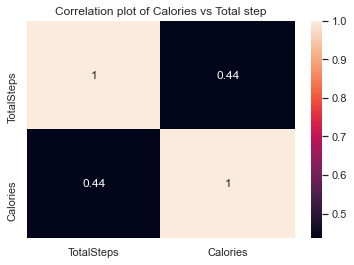

In [47]:
#Correlation plot
sns.heatmap(daily_gp[["TotalSteps", "Calories"]].corr(),annot = True)
plt.title("Correlation plot of Calories vs Total step")

The correlation value between calories and total step is 0.44. The value is a moderate positive correlation value.

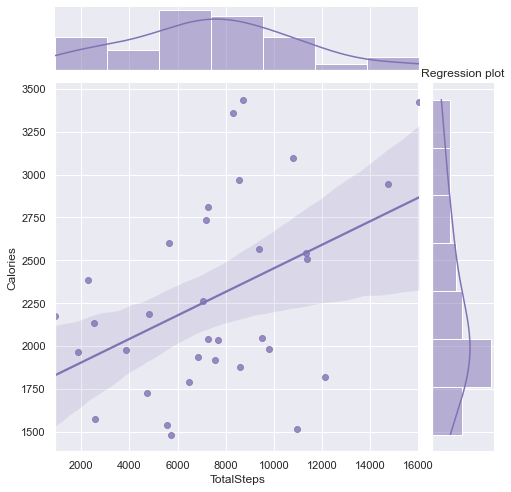

In [48]:
sns.jointplot(x = "TotalSteps", y = "Calories", 
                  data = daily_gp,
                  kind="reg",
                  color="m", height=7)
plt.title('Regression plot')
plt.show()

The trend is positive, and the relationship is not strong.

**Creating a new to count how many times users use the device in a month**

In [50]:
daily_gp["daily_use"] = daily.groupby('Id')['ActivityDate'].count()

In [52]:
#Counting the frequency of the number of days 
daily_gp.daily_use.value_counts()

31    21
30     3
26     2
29     2
4      1
18     1
19     1
20     1
28     1
Name: daily_use, dtype: int64

It can be seen that more that 90% of the user uses the devices more that 20 days in a month.

In [55]:
sleep_gr = sleep.groupby('Id').mean()

In [63]:
#Combining the sleep dataset and the daily activities dataset
combine = sleep_gr.join(daily_gp, on = 'Id')

Text(0.5, 1.0, 'Correlation plot Total Minutes Asleep, Total step, and Calories')

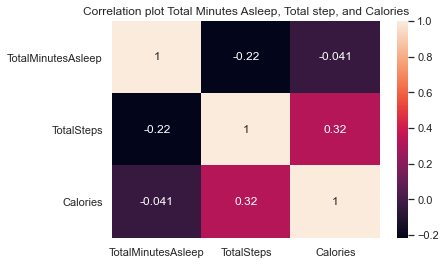

In [62]:
#Correlation plot
sns.heatmap(combine[["TotalMinutesAsleep", "TotalSteps", "Calories"]].corr(),annot = True)
plt.title("Correlation plot Total Minutes Asleep, Total step, and Calories")

The plot shows that the correlation between the total minutes asleep and calories is very low and negative. Also, the correlation between the total minutes asleep and total step is low and negative.

## Share Phase

### Key Findings

The key findings from the analysis:
- There exist a moderate relationship between daily total steps, and calories burn.
- Users sleep more on Sunday and wednesday
- Also, we find out that the higher the step individual takes daily, the lower the amount of time the person will spend sleeping.
- Majority of the device users are active user.
- People take more steps on saturdays compared to other days.


### Recommendations:

Base on the trend seen from the analysis, the following recommendations will be made:

- The company should focus more on sensitizing the users about the benefits of the devices.
- It was observed that mejority of the users make use of their devices, this shows that adding more futures to the device will help them stay glue to using the devices more.
- Users with the same demography can be paired, and there should be a users' dashboard where they will be able to see how other users' daily task performance.
- Daily target should be considered as a feature to the device.
- Also, more users should be added to the data for the analysis to be inferential on a larger populance.